In [2]:
# ================================
# Logistic Regression (from scratch) — Skeleton
# ================================

# 0) Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [3]:
# 1) Load / prepare data
# --------------------------------------------------
# Assumptions (edit as needed):
#   - Binary classification with labels in {0,1}
#   - X is an (m, n) feature matrix (no bias column yet)
#   - y is an (m,) label vector

uploaded = files.upload()

# TODO: replace with your real data loading
def load_data():
    # EXAMPLE PLACEHOLDER — REPLACE with file read:
    df = pd.read_csv("train_clean.csv") #df = data frame
    df.head()
    # (Optional) Feature scaling — often helps training stability
    # convert male to 1, female to 2.
    df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 2)
    # make age go between 0 and 1.
    df['Age'] = df['Age'].apply(lambda x: x / 100.0)

    # (Optional) Split the dataset into training and test
    num_training = int(len(df) * 0.8)
    trainData = df.iloc[0:num_training] # Setting data to first num_training rows
    testData = df.iloc[num_training:] # Setting data for the rest

    return trainData, testData

# Load the train and test data
trainData, testData = load_data()

print(len(trainData))
print(len(testData))

Saving train_clean.csv to train_clean.csv
712
179


In [ ]:
print(trainData.iloc[0])
print(testData.iloc[0])

Age                               0.22
Cabin                              NaN
Embarked                             S
Fare                              7.25
Name           Braund, Mr. Owen Harris
Parch                                0
PassengerId                          1
Pclass                               3
Sex                                  1
SibSp                                1
Survived                           0.0
Ticket                       A/5 21171
Title                               Mr
Family_Size                          1
Name: 0, dtype: object
Age                                0.48
Cabin                              C126
Embarked                              S
Fare                               52.0
Name           Taylor, Mr. Elmer Zebley
Parch                                 0
PassengerId                         713
Pclass                                1
Sex                                   1
SibSp                                 1
Survived                       

In [4]:
# Get X and Y.
def get_X_Y(df):
  # Convert Features numpy
  pclass = df['Pclass'].to_numpy()
  sex = df['Sex'].to_numpy()
  age = df['Age'].to_numpy()
  # Convert label to numpy
  survived = df['Survived'].to_numpy()

  # X has 3 features: pclass, sex, age
  # Add features and make them a matrix using column stack
  X = np.column_stack([pclass, sex, age])
  Y = survived
  return X, Y

def add_bias(X):
  # Add bias column (x0 = 1)
  #X = np.column_stack([np.ones(m), X])  # shape: (m, n+1)
  # m is the number of samples.
  m = X.shape[0]
  X = np.column_stack([np.ones(m), X])  # shape: (m, n+1)
  return X


# Extract X and Y from trainData and testData.
trainX, trainY = get_X_Y(trainData)
testX, testY = get_X_Y(testData)

# Add bias column (x0 = 1)
trainX = add_bias(trainX)
testX = add_bias(testX)

print(trainX[0:5])
print(trainY[0:5])
print(testX[0:5])
print(testY[0:5])

[[1.   3.   1.   0.22]
 [1.   1.   2.   0.38]
 [1.   3.   2.   0.26]
 [1.   1.   2.   0.35]
 [1.   3.   1.   0.35]]
[0. 1. 1. 1. 0.]
[[1.   1.   1.   0.48]
 [1.   3.   1.   0.29]
 [1.   2.   1.   0.52]
 [1.   3.   1.   0.19]
 [1.   1.   2.   0.38]]
[1. 0. 0. 0. 1.]


In [5]:
# 2) Utility functions: sigmoid, loss, gradient, prediction
# --------------------------------------------------
def sigmoid(z):
    # σ(z) = 1 / (1 + e^-z)
    # TODO: Complete the sigmoid function
    sig = 1 / (1 + np.exp(-z))
    return sig

def predict_proba(X, w):
    # p = σ(Xw)
    # TODO: Complete the predict probability function
    return sigmoid(np.dot(X,w))

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    # Log-loss = - [ y log(p) + (1-y) log(1-p) ]
    # You might need to restrict the values using np.clip
    # TODO: Complete the binary cross entropy function

    # If y_prob is 0, log function is -inf. So clip y_prob using eps.
    # The clipping range is [eps, 1 - eps].
    clipped_y_prob = np.clip(y_prob, eps, 1 - eps)

    # Calculate the Log-loss: - [ y log(p) + (1-y) log(1-p) ]
    log_loss = -1 * np.mean(y_true * np.log(clipped_y_prob) + (1 - y_true) * np.log(1 - clipped_y_prob))

    return log_loss

def gradient(X, y_true, y_prob):
    # ∂J/∂w = (1/m) X^T (p - y)
    # TODO: Complete the gradient descent function

    # m is the number of samples.
    m = X.shape[0]

    # ∂J/∂w = (1/m) X^T (p - y)
    # X.T is the transpose of X.
    # Matrix transposed so dot product is valid
    return (1 / m) * np.dot(X.T, y_prob - y_true)


In [6]:
# 3) Initialize parameters
# --------------------------------------------------
# TODO: set the initial values for the parameters
theta0 = -2
theta1 = 0.1 # Weight of Pclass, less important
theta2 = 6 # Weight of Gender, most important due "women and children first"
theta3 = -2 # Weight of Age, second most important, bigger age = more loss, smaller age = less loss
w = np.array([theta0, theta1, theta2, theta3])

# 4) Hyperparameters
# --------------------------------------------------
# TODO: set learning_rate and num_iterations
learning_rate = 0.01
num_iterations = 1000

# For tracking
cost_history = []

In [7]:
# 5) Gradient Descent loop
# --------------------------------------------------

for i in range(num_iterations):
  # TODO: Forward pass: compute probabilities
  y_prob = predict_proba(trainX, w)

  # TODO: Compute loss (log-loss / cross-entropy)
  loss = binary_cross_entropy(trainY, y_prob)
  # Save this value for later graphing
  cost_history.append(loss)

  # TODO: Backward pass: compute gradient
  grad = gradient(trainX, trainY, y_prob)

  # TODO Parameter update
  w = w - learning_rate * grad # Update w with learning_rate and gradient


In [8]:

# 6) Final parameters
# --------------------------------------------------
print("Final parameters (w):")
print(w)  # w[0] is bias term



Final parameters (w):
[-2.73633854 -1.65618219  4.66119024 -2.23282711]


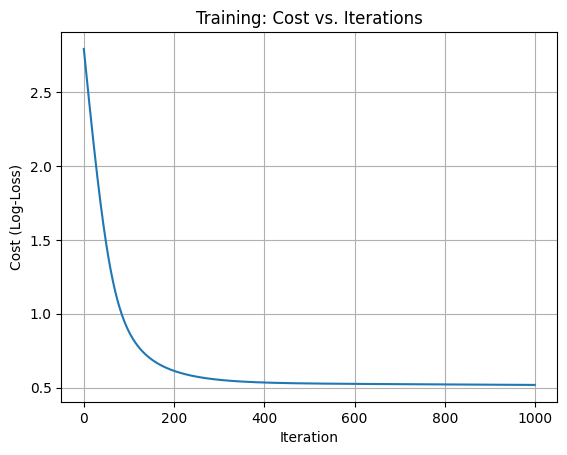

In [9]:

# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()


Plotting cost sensitivity for parameter indices: [2 3 1]


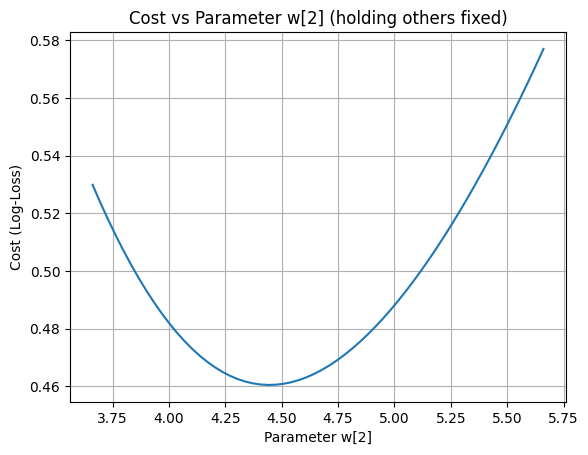

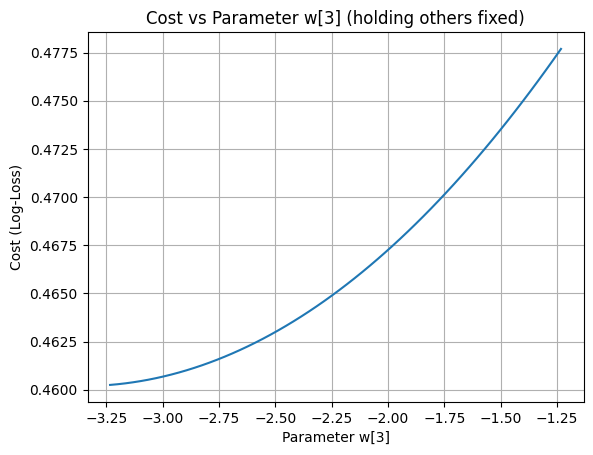

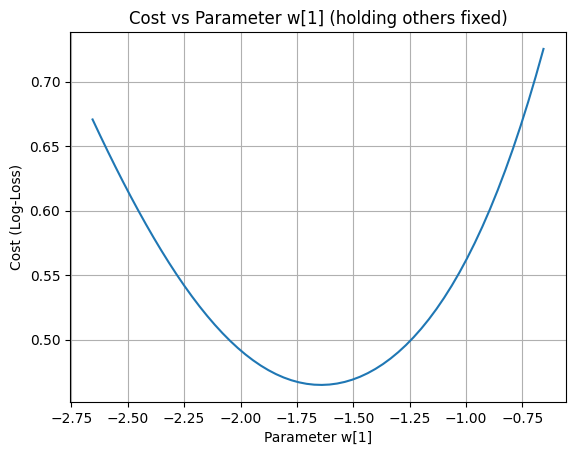

In [10]:
# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
# Idea: pick 3 parameters (excluding bias) by magnitude after training,
# then sweep each parameter around its learned value while holding others fixed,
# and plot the (1D) cost curve for each.
#At the end of training, you have a weight vector w (parameters). You also have a
# cost function 𝐽 ( 𝑤)
#J(w), which tells you how good or bad those weights are.

#Normally, we look at cost vs iterations (how the loss decreases over time). But sometimes it’s useful to see:
# “What happens to the cost if I wiggle just one parameter, while keeping all others fixed?”

# That’s what the sweep does.
#For each candidate value in the sweep, we create a temporary weight vector w_tmp.
# We replace the chosen parameter with val.
# Then we compute the cost 𝐽 (𝑤_tmp ) using the same dataset.
# Append that cost to a list.

#We plot:

#x-axis: the parameter’s value (from the sweep)

#y-axis: the cost computed at that parameter value

#This shows the “sensitivity curve” of the cost with respect to that parameter.

# Identify top-3 parameters by |w| (excluding bias at index 0)

param_indices = np.argsort(np.abs(w[1:]))[::-1][:3] + 1  # shift by 1 to skip bias
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
    # Helper to compute cost for a modified parameter vector
    y_hat_mod = predict_proba(testX, mod_w)
    return binary_cross_entropy(testY, y_hat_mod)

# For each chosen parameter, sweep values and compute cost
for idx in param_indices:
    center = w[idx]
    #  choose a sensible sweep range; here: ±1.0 around the trained value
    sweep = np.linspace(center - 1.0, center + 1.0, 60)

    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}]")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}] (holding others fixed)")
    plt.grid(True)
    plt.show()


In [16]:

# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    # Returns 0/1 predictions based on threshold
    return (predict_proba(X_new, w) >= threshold).astype(int)

# Example usage (remove in production):
preds = predict_label(testX, w)
accuracy = (preds == testY).mean()
print("Test accuracy (for reference only):", accuracy)
print("Feature(10)")
for i in range(0,10):
  # Printing out FALSE/TRUE for 0/1
  print("item " + str(i+1) + ": ", end = "")
  if(testY[i] == 0):
    print(False)
  else:
    print(True)
print("Predicted Y(10)")
for i in range(0,10):
  # Printing out FALSE/TRUE for 0/1
  print("item " + str(i+1) + ": ", end = "")
  if(preds[i] == 0):
    print(False)
  else:
    print(True)

Test accuracy (for reference only): 0.8044692737430168
Feature(10)
item 1: True
item 2: False
item 3: False
item 4: False
item 5: True
item 6: True
item 7: False
item 8: False
item 9: True
item 10: False
Predicted Y(10)
item 1: False
item 2: False
item 3: False
item 4: False
item 5: True
item 6: True
item 7: False
item 8: False
item 9: True
item 10: False
